## Getting started

In [1]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import pandas as pd
from pandas import Timestamp
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, extract_times, ALL_TIMES, interplevel
import sys, os
from glob import glob
import xarray as xr
%matplotlib inline

/glade/u/apps/ch/opt/pythonpkgs/2.7/xarray/0.9.5/intel/16.0.3/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
pwd

u'/glade2/work/jpiers/DEC16_notebooks'

In [3]:
mpl.font_manager._rebuild()

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.style'] = 'normal'

## Define some important landmarks

In [4]:
def landmarks():
    landmark_dict = {'C':(-64.2123,-31.3154),
                    'M':(-68.7987,-32.8278),
                    '3':(-64.1131,-32.1767),
                    '4':(-64.34992,-33.13067), 
                    'Y':(-64.7545,-32.1062),
                    'S':(-63.978435,-31.715689),
                    'SR':(-68.285522,-34.587997),
                    'SL':(-66.33694,-33.30278)}
    return landmark_dict

landmark_dict=landmarks()

## Select run/time, zoom

In [5]:
## Example:

run='2016-12-25_00:00:00'
tindex=int(0)
zoom='full'

## This is in the script, not sure what it means

#run=sys.argv[1] #listed under wrfplotting_full_domain
#tindex=int(sys.argv[2])
#zoom=sys.argv[3]

#run='2016-12-25_00:00:00'
#tindex=np.all([])
#tindex=np.arange(0,60,1) # i have 61 wrfout* files

#run=filenames[0] # selects the first file in filenames
#tindex=int(0)
#zoom='full'

## print(filenames)
print(run)#, tindex)

2016-12-25_00:00:00


## Make path and create filenames

In [6]:
titlestr='GFS-WRF'
modname='GFS'
path = "/glade2/work/jpiers/WRFV3/run/" # set path to where WRF output files are located
filenames = sorted(glob(path+"wrfout*")) # define wrf_files, sorted by time
outpath = 'DEC16_images/'+run+''

## Configuration Parameters

In [7]:
## Makes folder specific to run within the current directory - in this case, DEC16_notebooks
#os.system('mkdir -p '+outpath)

In [8]:
## Used to log the files and times that were run
## Probably not necessary for running individual plots

basetime=pd.to_datetime(run, format='%Y-%m-%d_%H:%M:%S')

files=[]
times=[]
#times=pd.date_range(start=basetime,periods=43,freq='H')

print(basetime)

2016-12-25 00:00:00


In [9]:
for file in filenames:
        #files.append(Dataset('/data/meso/a/jmulhol2/RELAMPAGO_Dry_Run_Data/12_Nov_2015/UIUC_WRF_runs/wrfout_d01_'+params['times'][params['time_index']].strftime('%Y-%m-%d %H:%M')))
        files.append(Dataset(file))
        print(os.path.basename(file)[11:])
        times.append(pd.to_datetime(os.path.basename(file)[11:],format='%Y-%m-%d_%H:%M:%S'))

2016-12-25_00:00:00
2016-12-25_01:00:00
2016-12-25_02:00:00
2016-12-25_03:00:00
2016-12-25_04:00:00
2016-12-25_05:00:00
2016-12-25_06:00:00
2016-12-25_07:00:00
2016-12-25_08:00:00
2016-12-25_09:00:00
2016-12-25_10:00:00
2016-12-25_11:00:00
2016-12-25_12:00:00
2016-12-25_13:00:00
2016-12-25_14:00:00
2016-12-25_15:00:00
2016-12-25_16:00:00
2016-12-25_17:00:00
2016-12-25_18:00:00
2016-12-25_19:00:00
2016-12-25_20:00:00
2016-12-25_21:00:00
2016-12-25_22:00:00
2016-12-25_23:00:00
2016-12-26_00:00:00
2016-12-26_01:00:00
2016-12-26_02:00:00
2016-12-26_03:00:00
2016-12-26_04:00:00
2016-12-26_05:00:00
2016-12-26_06:00:00
2016-12-26_07:00:00
2016-12-26_08:00:00
2016-12-26_09:00:00
2016-12-26_10:00:00
2016-12-26_11:00:00
2016-12-26_12:00:00
2016-12-26_13:00:00
2016-12-26_14:00:00
2016-12-26_15:00:00
2016-12-26_16:00:00
2016-12-26_17:00:00
2016-12-26_18:00:00
2016-12-26_19:00:00
2016-12-26_20:00:00
2016-12-26_21:00:00
2016-12-26_22:00:00
2016-12-26_23:00:00
2016-12-27_00:00:00
2016-12-27_01:00:00


In [10]:
## Define function 'make_plot'

def make_plot(cffield,lfield,lfield2,ufld,vfld,params):
# Get the latitude and longitude points

    print(params['time_index'])
    
    lats, lons = latlon_coords(cffield)

    # Get the basemap object

    if params['zoom'] == 'full':
        bm = Basemap(projection='lcc',width=3000*550,height=3000*375,
        resolution='i',lat_1=-32.8,lat_2=-32.8,lat_0=-32.8,lon_0=-67.0)
        fs=12
        params['skip']=17

    if params['zoom'] == 'cordoba_zoom':
        bm = Basemap(projection='lcc',width=1500*550,height=1500*375,
        resolution='i',lat_1=-32.2,lat_2=-32.2,lat_0=-32.2,lon_0=-65.0)
        fs=14 
        params['skip']=9
    
    if params['zoom'] == 'mendoza_zoom':
        bm = Basemap(projection='lcc',width=1500*550,height=1500*375,
        resolution='i',lat_1=-33.2,lat_2=-33.2,lat_0=-33.2,lon_0=-69.0)
        fs=14 
        params['skip']=9

    # Create a figure
    fig = plt.figure(figsize=(12,9))

    # Add geographic outlines
    bm.drawcoastlines(linewidth=0.75)
    bm.drawstates(linewidth=1.)
    bm.drawcountries(linewidth=1.)

    # Convert the lats and lons to x and y.  Make sure you convert the lats and lons to
    # numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))


    if lfield is not None:
        CS=bm.contour(x, y, to_np(lfield), 10, colors="black", levels=params['llevels'],linewidths=1.0)
        plt.clabel(CS, inline=1, fontsize=12, fmt='%d')

    if lfield2 is not None:
        CS=bm.contour(x, y, to_np(lfield2), 10, colors="dimgrey", levels=params['llevels2'],linewidths=2.25)
        #plt.clabel(CS, inline=1, fontsize=12, fmt='%d')
    
    if ufld is not None:
        bm.barbs(x[::params['skip'],::params['skip']], 
                 y[::params['skip'],::params['skip']], 
                 to_np(ufld[::params['skip'],::params['skip']]),
                 to_np(vfld[::params['skip'],::params['skip']]), length=5, linewidth=0.75, zorder=10)

    if not('lalpha' in params):
        params['lalpha']=None
        

    # Draw the contours and filled contours
    bm.contourf(x, y, to_np(cffield), 10, cmap=get_cmap(params['ccmap']), levels=params['clevels'], extend='both',
               alpha=params['lalpha'])


    parallels = np.arange(-50.,-10.,2.)
    # labels = [left,right,top,bottom]
    bm.drawparallels(parallels,labels=[False,True,False,False],linewidth=0.5,dashes=[2,2])
    meridians = np.arange(-90.,-50.,2.)
    bm.drawmeridians(meridians,labels=[False,False,False,True],linewidth=0.5,dashes=[2,2])

    # Add a color bar
    plt.colorbar(shrink=.62, extend='both')

    timediff=params['times'][params['time_index']]-params['times'][0]
    timediff_secs=int(timediff.total_seconds()//3600)

    plt.title(titlestr+' '+cffield.description+' ('+cffield.units+')\n'+
             "Initialized: "+params['times'][0].strftime('%Y-%m-%d %H:%M')+"Z Forecast hour: "+'{:03d}'.format(timediff_secs)+" Valid: "+params['times'][params['time_index']].strftime('%Y-%m-%d %H:%M')+'Z')

    for key in landmark_dict.keys():
        kx,ky=bm(landmark_dict[key][0],landmark_dict[key][1])
        plt.text(kx,ky,key,fontsize=fs,
                        ha='center',va='center',color='b')
    #fig.figimage(im, fig.bbox.xmax-290, fig.bbox.ymin,zorder=10)


0


/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api

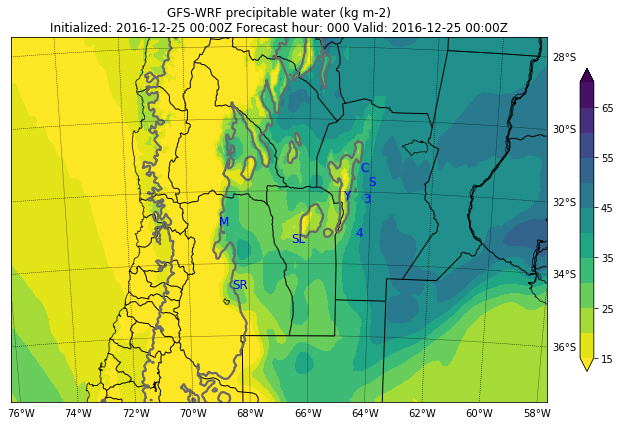

In [11]:
#=====================PRECIPITABLE WATER=========================
params={'outpath':outpath,
        'modname':modname,
        'modfld':'Precipitable_Water',
        'cfield':'pw',
        'clevels':np.arange(15,75,5),
        'ccmap':"viridis_r",
        'llevels':None,
        'llevels2':[1000],
        'time_index':tindex,
        'times':times,
        'zoom':zoom,
        'skip':17}

cffield = getvar(files, params['cfield'], timeidx=params['time_index'])
lfield = None
lfield2 = getvar(files, 'ter', timeidx=params['time_index'], units='m')
ufld = None
vfld = None

make_plot(cffield,lfield,lfield2,ufld,vfld,params)

#outpath = 'DEC16_images/'+cfield+''

## Makes folder specific to run within the current directory - in this case, DEC16_notebooks
#os.system('mkdir -p '+outpath)

# save figure - default is in same directory as notebook - see pwd above
#plt.savefig(outpath + "+cfield+.png", bbox_inches="tight", dpi=200)


0


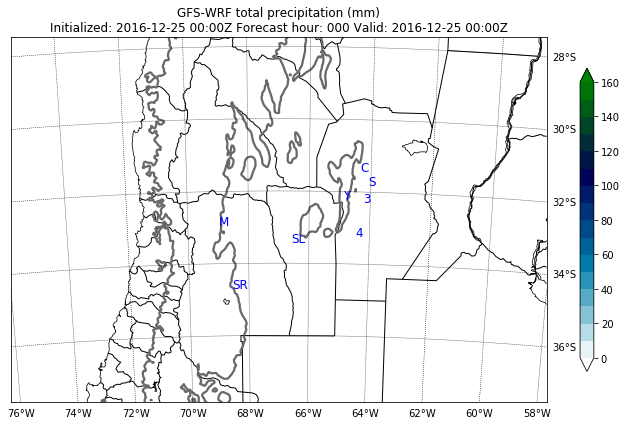

In [12]:
#====================TOTAL PRECIPITAITON=========================
params={'outpath':outpath,
        'modname':modname,
        'modfld':'Total_Precipitation',
        'cfield':'RAINNC',
        'clevels':np.arange(0,165,10),
        'ccmap':"ocean_r",
        'llevels':None,
        'llevels2':[1000],
        'time_index':tindex,
        'times':times,
        'zoom':zoom,
        'skip':17}

cffield=None
cffield = getvar(files, params['cfield'], timeidx=params['time_index'])
cffield.attrs['description']='total precipitation'
cffield.attrs['units']='mm'
lfield = None
lfield2 = getvar(files, 'ter', timeidx=params['time_index'], units='m')
ufld = None
vfld = None

make_plot(cffield,lfield,lfield2,ufld,vfld,params)

0


/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3799: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/glade/u/apps/ch/opt/pythonpkgs/2.7/matplotlib/2.0.2/gnu/6.3.0/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3815: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


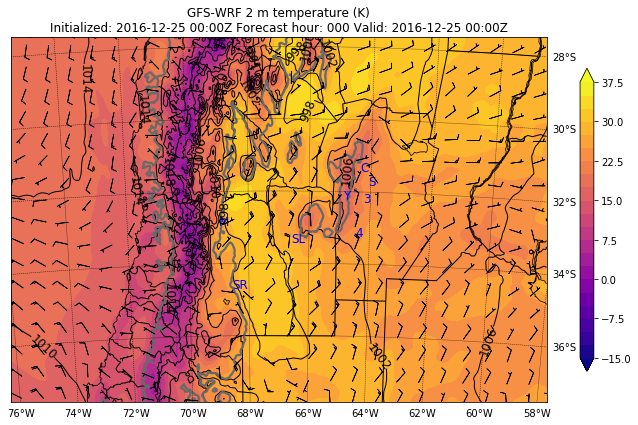

In [13]:
#=====================2 M TEMP=========================
params={'outpath':outpath,
        'modname':modname,
        'modfld':'2m_Temperature',
        'cfield':'T2',
        'clevels':np.arange(-15,40,2.5),
        'ccmap':"plasma",
        'llevels':np.arange(970,1040,4),
        'llevels2':[1000],
        'time_index':tindex,
        'times':times,
        'zoom':zoom,
        'skip':17}

cffield = getvar(files, params['cfield'], timeidx=params['time_index'],units='degC')
cffield.attrs['description']='2 m temperature'
cffield.attrs['temperature']='degC'
cffield.values=cffield.values-273.15
lfield = getvar(files, 'slp', timeidx=params['time_index'], units='hPa')
lfield2 = getvar(files, 'ter', timeidx=params['time_index'], units='m')
uvmet = getvar(files, 'uvmet10', timeidx=params['time_index'], units='kt')
ufld = uvmet.isel(u_v=0)
vfld = uvmet.isel(u_v=1)

make_plot(cffield,lfield,lfield2,ufld,vfld,params)